A equipe da [Udacity](https://udacity.com) disponibilizou informações sobre uma parte dos passageiros à bordo do RMS Titanic no dia daquela tragédia. Esse _dataset_ que contém informações reais vem sendo utilizado em diversos estudos de caso, além de servir de base para aprendizado de Ciência de Dados, Estatística e Machine Learning.

O arquivo **titanic_data.csv** contém informações reais sobre os passageiros organizadas da seguinte forma:

- Survived (Sobreviveu): 0 = Não, 1 = Sim
- Pclass (Classe): Classe de ingresso 1 = 1º, 2 = 2º, 3 = 3º
- Sex (Sexo): Sexo do passageiro
- Age (Idade): Idade em anos
- Sibsp: Quantidade de irmãos / cônjuges a bordo do Titanic
- Parch: Quantidade de pais / crianças a bordo do Titanic
- Ticket (Bilhete): Número do bilhete de embarque
- Fare (Tarifa): Tarifa paga pelo Passageiro
- Cabin (Cabine): Número de cabine
- Embarked (Embarque): Porto de Embarque (C = Cherbourg, Q = Queenstown, S = Southampton)



## Importando o DataSet

In [1]:
#IMPORTANDO O PANDAS E O NUMPY
import pandas as pd
import numpy as np

# LENDO O CSV
df = pd.read_csv('/content/titanic.csv')

## Conhecendo o DataSet

2. Visualizando a quantidade de linhas e colunas e o tipo delas.


In [2]:
# MOSTRANDO QUANTAS LINHAS E COLUNAS TEM NO DF
df.shape

(891, 12)

In [3]:
#MOSTRANDO QUAL O TIPO DAS COLUNAS DO DF
df.dtypes

PassengerId      int64
Name            object
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

3 - Visualizando os primeiros e os últimos registros do dataset

In [4]:
# MOSTRANDO OS 10 PRIMEIROS
df.head(10)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,"Moran, Mr. James",3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,"McCarthy, Mr. Timothy J",1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,"Palsson, Master. Gosta Leonard",3,male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",3,female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",2,female,14.0,1,0,237736,30.0708,NaN,C,1


In [5]:
# MOSTRANDO OS 10 ÚLTIMOS
df.tail(10)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
881,882,"Markun, Mr. Johann",3,male,33.0,0,0,349257,7.8958,NaN,S,0
882,883,"Dahlberg, Miss. Gerda Ulrika",3,female,22.0,0,0,7552,10.5167,NaN,S,0
883,884,"Banfield, Mr. Frederick James",2,male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,0
884,885,"Sutehall, Mr. Henry Jr",3,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
885,886,"Rice, Mrs. William (Margaret Norton)",3,female,39.0,0,5,382652,29.1250,NaN,Q,0
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.7500,NaN,Q,0


4 - Tratamento de dados nulos

In [6]:
#MOSTRANDO DADOS FALTANTES
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [7]:
#VISUALIZANDO A MÉDIA DA COLUNA AGE
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
# PREENCHENDO A IDADE COM A MÉDIA
mean_age = df[ df.Age.notna() ].Age.mean()

# SELECIONANDO ONDE AS LINHAS DE AGE SÃO NAN
df.loc[ df.Age.isna(), 'Age'] = mean_age

# PREENCHENDO AS CABINES COM VALORES NULOS COM "DESCONHECIDA"
df.loc[ df.Cabin.isna(), 'Cabin' ] = "Desconhecida"

# PREENCHENDO OS EMBARQUES COM VALORES NULOS COM "DESCONHECIDO"
df.loc[ df.Embarked.isna(), 'Embarked' ] = "Desconhecido"

df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.000000,1,0,A/5 21171,7.2500,Desconhecida,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.000000,0,0,STON/O2. 3101282,7.9250,Desconhecida,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.000000,0,0,373450,8.0500,Desconhecida,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.000000,0,0,211536,13.0000,Desconhecida,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,29.699118,1,2,W./C. 6607,23.4500,Desconhecida,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.000000,0,0,111369,30.0000,C148,C,1


In [9]:
#VERIFICANDO ALTERAÇÕES
df.isna().sum()

PassengerId    0
Name           0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [10]:
#TRANSFORMANDO COLUNA AGE PARA INT
df['Age'] = df['Age'].astype(int)
df['Age'].dtype

dtype('int64')

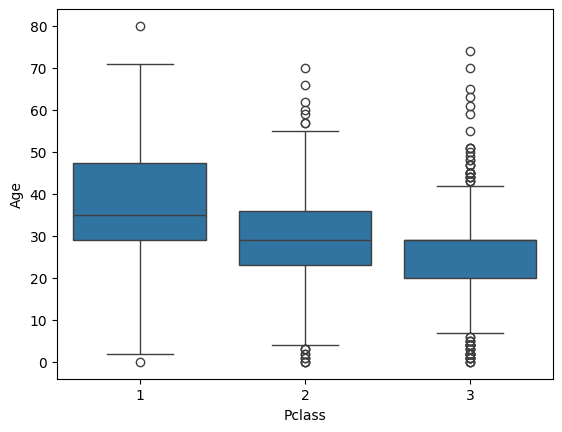

In [11]:
#VISUALIZANDO A IDADE DAS PESSOAS EM CADA CLASSE
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

## Adequando o DataSet

5 - Excluindo as colunas PassengerID, Sibsp, Parch e Ticket, que não serão utilizadas para análises

In [12]:
# APAGANDO AS COLUNAS DA LISTA PELA POSIÇÃO, SEM RETORNAR UM NOVO OBJETO (INPLACE)

df.drop(df.columns[[0, 5, 6, 7]], axis=1, inplace=True)
df

,Name,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived
0,"Braund, Mr. Owen Harris",3,male,22,7.2500,Desconhecida,S,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38,71.2833,C85,C,1
2,"Heikkinen, Miss. Laina",3,female,26,7.9250,Desconhecida,S,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35,53.1000,C123,S,1
4,"Allen, Mr. William Henry",3,male,35,8.0500,Desconhecida,S,0
...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",2,male,27,13.0000,Desconhecida,S,0
887,"Graham, Miss. Margaret Edith",1,female,19,30.0000,B42,S,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,29,23.4500,Desconhecida,S,0
889,"Behr, Mr. Karl Howell",1,male,26,30.0000,C148,C,1


## Alguns números

6 - Verificar quantos homens e mulheres estavam a bordo

In [13]:
# MOSTRANDO QUANTOS HOMENS E QUANTAS MULHERES ESTAVAM A BORDO
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

7 - Quantos passageiros sobreviveram e quantos não sobreviveram?

In [14]:
# MOSTRANDO QUANTOS PASSAGEIROS SOBREVIVERAM E QUANTOS NÃO SOBREVIVERAM
df.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

8- Qual o sexo dos sobreviventes e dos não sobreviventes?

In [15]:
female_survivors = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]
female_dead = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]
male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
male_dead = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]

print("Mulheres sobreviventes: {}".format(len(female_survivors)))
print("Homens sobreviventes: {}".format(len(male_survivors)))
print("Mulheres mortas: {}".format(len(female_dead)))
print("Homens mortos: {}".format(len(male_dead)))




Mulheres sobreviventes: 233
Homens sobreviventes: 109
Mulheres mortas: 81
Homens mortos: 468


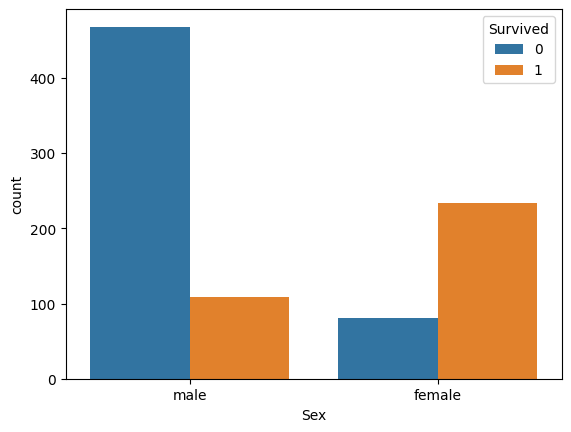

In [16]:
barplot = sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

9 - Visualização proporcional da sobrevivência

In [17]:
# PROPORCIONALMENTE SOBREVIVERAM MAIS HOMENS OU MULHERES
homens_total = len(df[ df.Sex == "male" ])
mulheres_total = len(df[ df.Sex == "female" ])

mulheres_sobrev = len(df[ (df.Sex == "female") & (df.Survived == 1) ])
homens_sobrev = len(df[ (df.Sex == "male") & (df.Survived == 1) ])

porcentagem_mulheres = (mulheres_sobrev / mulheres_total)*100
porcentagem_homens = (homens_sobrev / homens_total)*100

print(f'Mulheres sobreviventes: {porcentagem_mulheres:.2f}%')
print(f'Homens sobreviventes: {porcentagem_homens:.2f}%')

Mulheres sobreviventes: 74.20%
Homens sobreviventes: 18.89%


<ipython-input-18-e2293cb4b887>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Survival Percentage', data=percentage_df, palette="viridis")


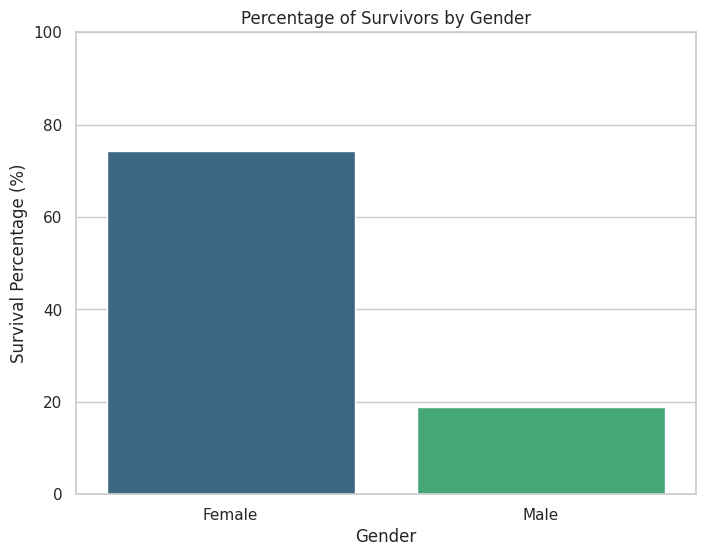

In [18]:
data = {
    'Gender': ['Female', 'Male'],
    'Survival Percentage': [porcentagem_mulheres, porcentagem_homens]
}

percentage_df = pd.DataFrame(data)

# GRÁFICO DE BARRAS
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Survival Percentage', data=percentage_df, palette="viridis")

plt.title('Percentage of Survivors by Gender')
plt.ylabel('Survival Percentage (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()

10 - Visualização da idade do maior número de mortos

In [19]:
# MOSTRANDO A IDADE COM MAIOR NÚMERO DE MORTOS

df[ df.Survived == 0 ].groupby(['Age']).Age.size().sort_values(ascending=False)

Age
29    137
28     20
21     19
30     17
18     17
     ... 
15      1
66      1
6       1
3       1
74      1
Name: Age, Length: 64, dtype: int64

<ipython-input-20-ae8b3ef1ece6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Count', data=age_counts_df, palette="viridis")


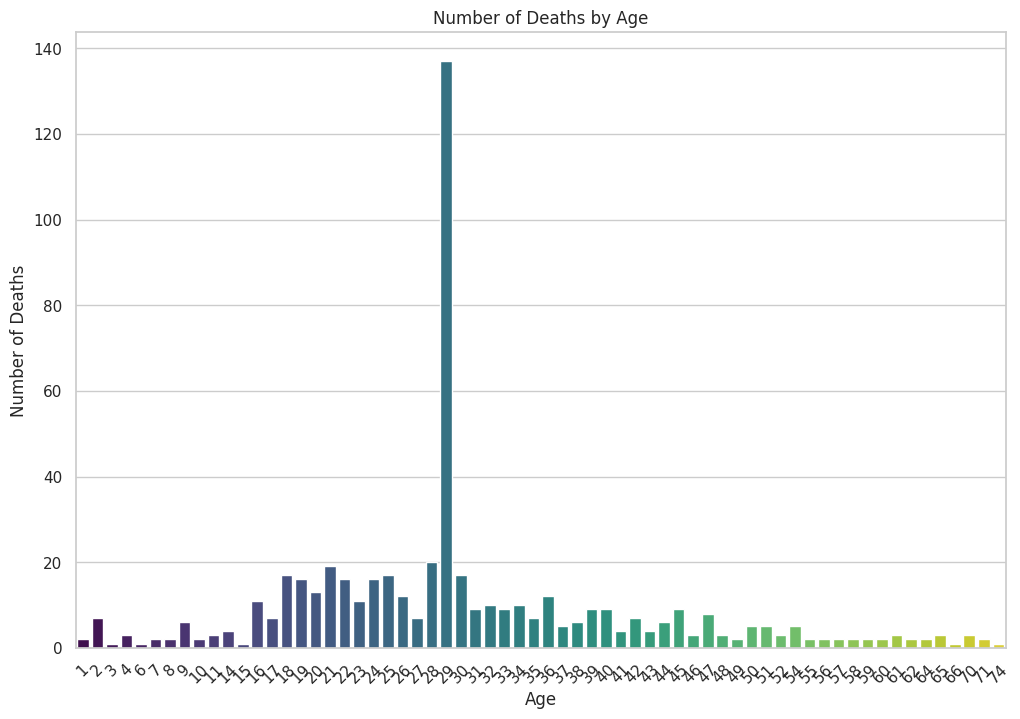

In [20]:
dead = df[df.Survived == 0]

# AGRUPAR POR IDADE E CONTAR O Nº DE MORTOS EM CADA IDADE
age_counts = dead.groupby('Age').Age.size().sort_values(ascending=False)

# CRIAR UM DF COM RESULTADOS
age_counts_df = age_counts.reset_index(name='Count')

# GRÁFICO DE BARRAS
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Count', data=age_counts_df, palette="viridis")

plt.title('Number of Deaths by Age')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.show()

In [21]:
# MOSTRANDO A MÉDIA DAS IDADES DOS HOMENS SOBREVIVENTES
media_homem_sob = int(df[ (df.Survived == 1) & (df.Sex == "male") ].Age.mean())
print(media_homem_sob)

27


11 - Proporção de sobreviventes por sexo levando em consideração passageiros prioritários (mulheres e crianças de até 15 anos independente do sexo)

In [22]:
# MOSTRANDO QUAL É A PROPORÇÃO DE SOBREVIVENTES POR SEXO ( CRIANÇAS E MULHERES)

criancas = df[(df.Age <= 15)]
criancas_sobrev = criancas[ criancas.Survived == 1 ]

mulheres_total = df[ (df.Sex == "female")]
mulheres_sobrev = mulheres_total[ mulheres_total.Survived== 1 ]

print("Sobreviventes mulheres: {:.2f}%".format(100 * len(mulheres_sobrev) / len(mulheres_total)))
print("Sobreviventes crianças: {:.2f}%".format(100 * len(criancas_sobrev) / len(criancas)))

#Sobreviventes mulheres: 74.20%
#Sobreviventes meninos: 52.50%

Sobreviventes mulheres: 74.20%
Sobreviventes crianças: 59.04%


12 - Quantidade de passageiros por classe?

In [23]:
# MOSTRANDO A QUANTIDADE DE PASSAGEIROS POR CLASSE
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [24]:
#CRIANDO UMA COLUNA QUE DEFINE CRIANÇA, ADULTO, IDOSO
df['Category'] = np.where(df['Age']<=15, "crianca", np.where(df['Age']<=60, "adulto", "idoso"))
df


,Name,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,Category
0,"Braund, Mr. Owen Harris",3,male,22,7.2500,Desconhecida,S,0,adulto
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38,71.2833,C85,C,1,adulto
2,"Heikkinen, Miss. Laina",3,female,26,7.9250,Desconhecida,S,1,adulto
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35,53.1000,C123,S,1,adulto
4,"Allen, Mr. William Henry",3,male,35,8.0500,Desconhecida,S,0,adulto
...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",2,male,27,13.0000,Desconhecida,S,0,adulto
887,"Graham, Miss. Margaret Edith",1,female,19,30.0000,B42,S,1,adulto
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,29,23.4500,Desconhecida,S,0,adulto
889,"Behr, Mr. Karl Howell",1,male,26,30.0000,C148,C,1,adulto


In [25]:
df['Category'].value_counts()

Category
adulto     786
crianca     83
idoso       22
Name: count, dtype: int64

<ipython-input-26-b807fefebda8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=survivors_df, x='Category', palette='viridis')


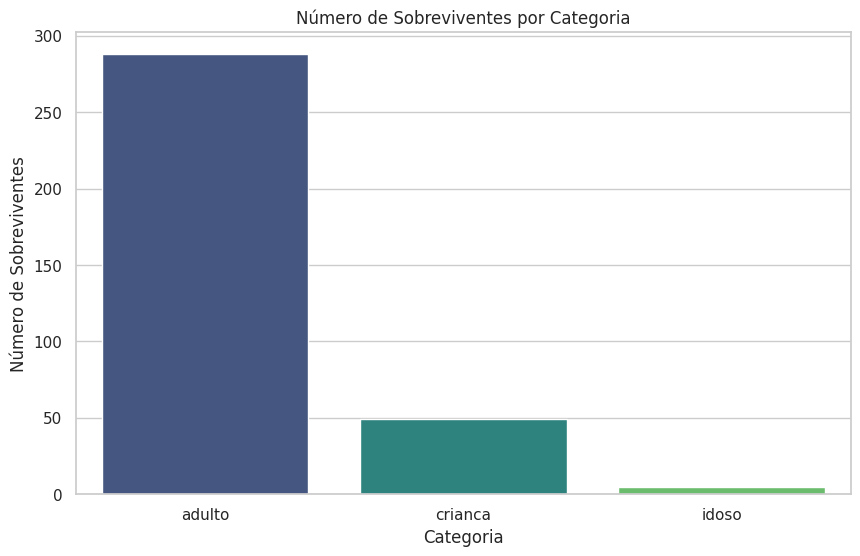

In [26]:
survivors_df = df[df['Survived'] == 1]

# GRÁFICO DE BARRAS
plt.figure(figsize=(10, 6))
sns.countplot(data=survivors_df, x='Category', palette='viridis')
plt.title('Número de Sobreviventes por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Sobreviventes')
plt.show()

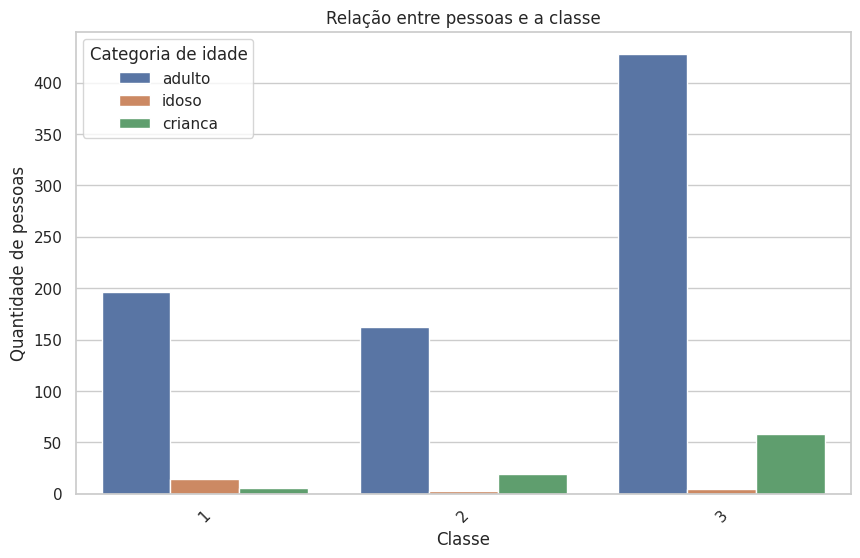

In [27]:
grouped = df.groupby(['Pclass', 'Category']).size().unstack()

#GRÁFICO DE BARRAS PARALELAS
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Category', data=df)

plt.title('Relação entre pessoas e a classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade de pessoas')
plt.xticks(rotation=45)
plt.legend(title='Categoria de idade')

plt.show()


13 - Percentual de sobreviventes por classe

In [28]:
# MOSTRANDO A QUANTIDADE DE SOBREVIVENTES POR CLASSE
cl_1 = len(df[ df.Pclass == 1 ])
cl_2 = len(df[ df.Pclass == 2 ])
cl_3 = len(df[ df.Pclass == 3 ])

sobrev_1 = len(df[ (df.Survived == 1) & (df.Pclass == 1) ])
sobrev_2 = len(df[ (df.Survived == 1) & (df.Pclass == 2) ])
sobrev_3 = len(df[ (df.Survived == 1) & (df.Pclass == 3) ])

print("Primeira Classe: {}, Percentual de sobreviventes = {:.2f}%".format(sobrev_1, sobrev_1 * 100 / cl_1))
print("Segunda Classe: {}, Percentual de sobreviventes = {:.2f}%".format(sobrev_2, sobrev_2 * 100 / cl_2))
print("Terceira Classe: {}, Percentual de sobreviventes = {:.2f}%".format(sobrev_3, sobrev_3 * 100 / cl_3))

Primeira Classe: 136, Percentual de sobreviventes = 62.96%
Segunda Classe: 87, Percentual de sobreviventes = 47.28%
Terceira Classe: 119, Percentual de sobreviventes = 24.24%


In [29]:
# CRIANDO UM NOVO DATAFRAME MOSTRANDO A QUANTIDADE DE SOBREVIVENTES AGRUPADOS POR CLASSE E SEXO
df.groupby(['Sex', 'Pclass', 'Survived']).size().unstack(level=1)

Pclass            1   2    3
Sex    Survived             
female 0          3   6   72
       1         91  70   72
male   0         77  91  300
       1         45  17   47

14 - Entendendo como a coluna Fare se relaciona com a coluna Pclass

In [30]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
#RESUMO ESTATÍSTICO ENTRE AS DUAS COLUNAS
fare_summary = df.groupby('Pclass')['Fare'].describe()
print(fare_summary)

        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


<ipython-input-32-070ad9d01177>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Fare', estimator='mean', ci=None, palette='viridis')
<ipython-input-32-070ad9d01177>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Fare', estimator='mean', ci=None, palette='viridis')


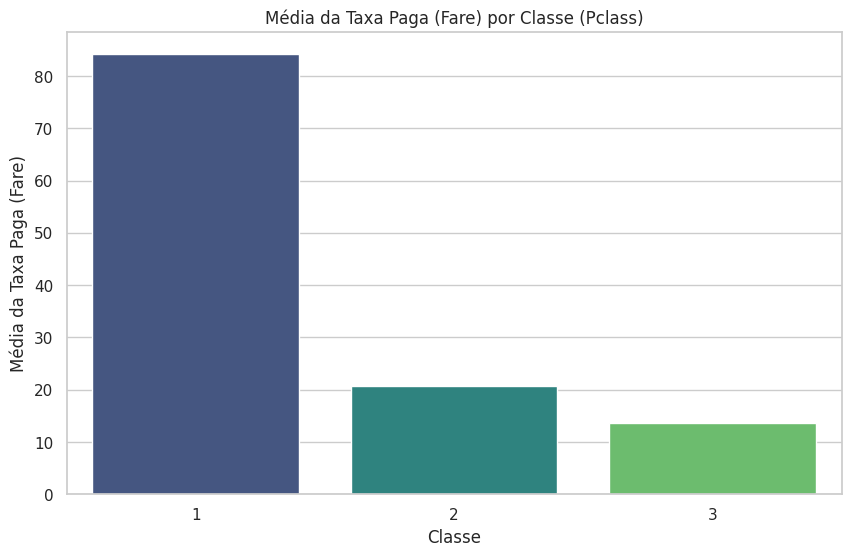

In [32]:
#VISUALIZAÇÃO ATRAVÉS DE UM GRÁFICO DE BARRAS DA MÉDIA DA TARIFA PAGA EM CADA CLASSE
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Pclass', y='Fare', estimator='mean', ci=None, palette='viridis')
plt.title('Média da Taxa Paga (Fare) por Classe (Pclass)')
plt.xlabel('Classe')
plt.ylabel('Média da Taxa Paga (Fare)')
plt.show()

<ipython-input-33-0dcb6f7446e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', palette='viridis')


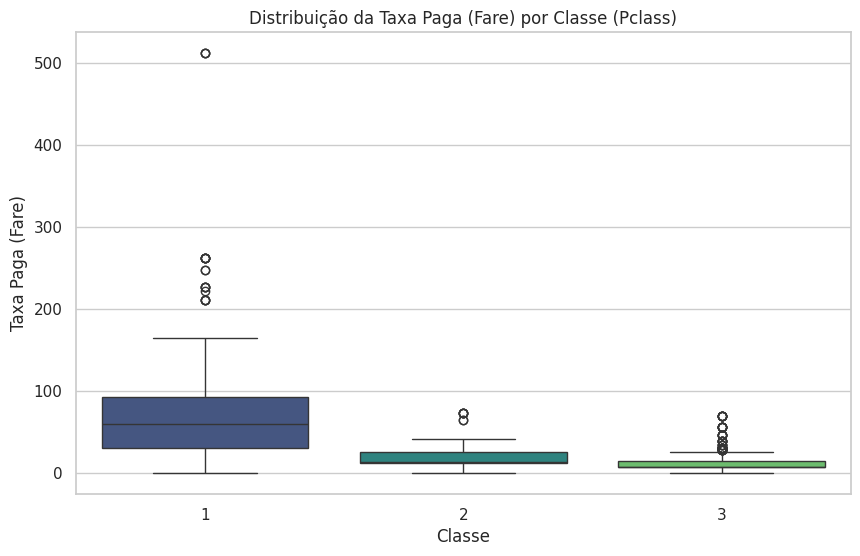

In [33]:
#VISUALIZAÇÃO COM BOXPLOT PARA ANALISAR OS OUTLIERS DE TARIFA PARA CADA CLASSE
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='viridis')
plt.title('Distribuição da Taxa Paga (Fare) por Classe (Pclass)')
plt.xlabel('Classe')
plt.ylabel('Taxa Paga (Fare)')
plt.show()

## Probabilidade Condicional

15 - Probabilidade condicional de uma pessoa sobreviver, dado seu sexo e a classe em que estava viajando:
- P(S= true | G=female,C=1)
- P(S= true | G=female,C=2)
- P(S= true | G=female,C=3)
- P(S= true | G=male,C=1)
- P(S= true | G=male,C=2)
- P(S= true | G=male,C=3)

In [34]:
# CÁLCULO DA PROPABILIDADE CONDICIONAL DE UMA PESSOA SOBREVIVER, DE ACORDO COM O SEXO E CLASSE QUE ESTAVA VIAJANDO
# Teorema de Bayes: P(A|B) = P(A∩B) / P(B)

probs = dict()
probs['male'] = list()
probs['female'] = list()
for gender in ["male", "female"]:
    for pclass in [1, 2, 3]:
        # P(Sobreviveu ∩ Classe e Sexo)
        AB = len(df[ (df.Sex == gender) & (df.Pclass == pclass) & (df.Survived == 1) ])
        # P(Classe e Sexo)
        B = len(df[ (df.Sex == gender) & (df.Pclass == pclass) ])
        # P(Sobreviveu | Classe e Sexo)
        probs[gender].append("{:.2f}%".format(100 * AB / B))

print("Probabilidade de sobrevivência por sexo e classe:")
df_prob = pd.DataFrame(data= probs, index=[1, 2, 3])
df_prob


Probabilidade de sobrevivência por sexo e classe:


,male,female
1,36.89%,96.81%
2,15.74%,92.11%
3,13.54%,50.00%


16 - Aplicando o algoritmo Naive Bayes


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

#TRANSFORMAR A COLUNA SEX (CATEGÓRICA) EM NUMÉRICA
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# DEFINIR X COMO SEX E PCLASS E Y COMO SURVIVED
X = df[['Sex', 'Pclass']].values
y = df['Survived'].values

In [44]:
# CRIAR O MODELO NAIVE BAYES
model = GaussianNB()

model.fit(X, y)

# DEFINIR AS COMBINAÇÕES ENTRE SEXO E CLASSE
combinations = [
    (0, 1),  # Female, 1st class
    (0, 2),  # Female, 2nd class
    (0, 3),  # Female, 3rd class
    (1, 1),  # Male, 1st class
    (1, 2),  # Male, 2nd class
    (1, 3)   # Male, 3rd class
]

# CALCULAR E IMPRIMIR AS PROBABILIDADES CONDICIONAIS
for sex, pclass in combinations:
    prob = model.predict_proba([[sex, pclass]])[0][1]  # Probabilidade de sobrevivência (classe 1)
    sex_label = 'Mulher' if sex == 0 else 'Homem'
    print(f'Probabilidade de sobrevivência para {sex_label} na classe {pclass}: {prob*100:.2f}%')

Probabilidade de sobrevivência para Mulher na classe 1: 96.49%
Probabilidade de sobrevivência para Mulher na classe 2: 88.18%
Probabilidade de sobrevivência para Mulher na classe 3: 77.04%
Probabilidade de sobrevivência para Homem na classe 1: 41.96%
Probabilidade de sobrevivência para Homem na classe 2: 16.41%
Probabilidade de sobrevivência para Homem na classe 3: 8.12%
